Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data=pd.read_csv('/content/drive/MyDrive/NLP /IMDB Dataset.csv')
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Data Visualization

In [5]:
data.columns

Index(['review', 'sentiment'], dtype='object')

In [6]:
data['review'].isnull().sum()

0

In [7]:
data['sentiment'].isnull().sum()

0

In [8]:
data['review'].value_counts()

Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.                                                                                                                                                                                                                

<Axes: >

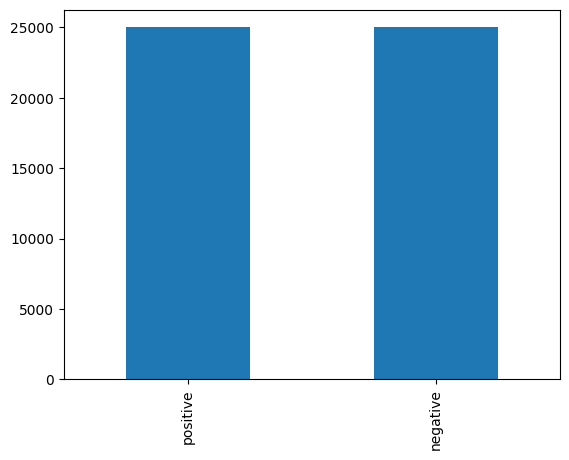

In [9]:
data['sentiment'].value_counts().plot(kind='bar')

Text Preprocessing

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Data Cleansing:

In [11]:
import re
import string

def clean_text(text ):
    text =''.join(word for word in text if word not in string.punctuation)
    text1 = ''.join(w.lower() for w in text if not w.isdigit())
    return text1

Tokenization, Lemmatization

In [12]:
# Lemmatization of text data
def lemmatize_text(text):
    wordlist = []
    lemmatizer = WordNetLemmatizer()
    # Sentence tokenization
    sentences = nltk.sent_tokenize(str(text))

    intial_sentences = sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]

    # Word tokenization
    for sentence in intial_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    for sentence in final_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    return wordlist

Applying Functions on train data

In [13]:
# Apply the functions on sentiment column

# Clean
data['sentiment'] = data['sentiment'].apply(lambda x: clean_text(x))
# Lemmatize
data['sentiment'] = data['sentiment'].apply(lambda x: lemmatize_text(x))

In [14]:
# Apply the functions on review column

# Clean
data['review'] = data['review'].apply(lambda x: clean_text(x))
# Lemmatize
data['review'] = data['review'].apply(lambda x: lemmatize_text(x))

In [15]:
data

,review,sentiment
0,"[one, of, the, other, reviewers, has, mentione...",[positive]
1,"[a, wonderful, little, production, br, br, the...",[positive]
2,"[i, thought, this, was, a, wonderful, way, to,...",[positive]
3,"[basically, theres, a, family, where, a, littl...",[negative]
4,"[petter, matteis, love, in, the, time, of, mon...",[positive]
...,...,...
49995,"[i, thought, this, movie, did, a, down, right,...",[positive]
49996,"[bad, plot, bad, dialogue, bad, acting, idioti...",[negative]
49997,"[i, am, a, catholic, taught, in, parochial, el...",[negative]
49998,"[im, going, to, have, to, disagree, with, the,...",[negative]


In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Display the original DataFrame
print("Original DataFrame:")
print(data)

# Convert lists in the 'sentiment' column to strings
data['sentiment'] = data['sentiment'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform sentiment column
data['encoded_sentiment'] = label_encoder.fit_transform(data['sentiment'])

# Display the DataFrame with the encoded sentiment column
print("\nDataFrame with Encoded Sentiment:")
print(data)

Original DataFrame:
                                                  review   sentiment
0      [one, of, the, other, reviewers, has, mentione...  [positive]
1      [a, wonderful, little, production, br, br, the...  [positive]
2      [i, thought, this, was, a, wonderful, way, to,...  [positive]
3      [basically, theres, a, family, where, a, littl...  [negative]
4      [petter, matteis, love, in, the, time, of, mon...  [positive]
...                                                  ...         ...
49995  [i, thought, this, movie, did, a, down, right,...  [positive]
49996  [bad, plot, bad, dialogue, bad, acting, idioti...  [negative]
49997  [i, am, a, catholic, taught, in, parochial, el...  [negative]
49998  [im, going, to, have, to, disagree, with, the,...  [negative]
49999  [no, one, expects, the, star, trek, movies, to...  [negative]

[50000 rows x 2 columns]

DataFrame with Encoded Sentiment:
                                                  review sentiment  \
0      [one, of, the,

Vectorization

Count Vectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import nltk

data['review'] = data['review'].apply(lambda x: ' '.join(map(str, x)))
data['Combined_Text'] = data['review']

vectorizer = CountVectorizer(analyzer='word', stop_words='english',
                             ngram_range=(1, 3), max_df=0.75,
                             min_df=5, max_features=5000)

countMat = vectorizer.fit_transform(data['Combined_Text'])

feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['abandoned' 'abc' 'abilities' ... 'zombie' 'zombies' 'zone']


In [18]:
len(feature_names)

5000

In [19]:
print(countMat)

  (0, 3700)	1
  (0, 2815)	1
  (0, 4814)	2
  (0, 2411)	2
  (0, 3188)	5
  (0, 1435)	2
  (0, 4981)	1
  (0, 2136)	1
  (0, 3714)	2
  (0, 1472)	1
  (0, 2008)	1
  (0, 2792)	1
  (0, 454)	3
  (0, 4456)	1
  (0, 4247)	2
  (0, 3832)	1
  (0, 4741)	4
  (0, 3924)	1
  (0, 4910)	1
  (0, 4606)	1
  (0, 3485)	1
  (0, 1313)	1
  (0, 3932)	1
  (0, 2018)	1
  (0, 787)	1
  :	:
  (49999, 702)	1
  (49999, 3805)	1
  (49999, 2482)	1
  (49999, 4660)	1
  (49999, 2545)	1
  (49999, 1494)	1
  (49999, 260)	1
  (49999, 2020)	1
  (49999, 3042)	1
  (49999, 2249)	1
  (49999, 2230)	1
  (49999, 1566)	1
  (49999, 211)	1
  (49999, 2972)	1
  (49999, 4587)	1
  (49999, 2470)	1
  (49999, 4158)	1
  (49999, 3656)	1
  (49999, 2934)	1
  (49999, 1436)	1
  (49999, 610)	1
  (49999, 2970)	1
  (49999, 709)	1
  (49999, 1913)	1
  (49999, 3654)	1


Splitting up the dataset

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(countMat,
                                                    data['encoded_sentiment'],
                                                    stratify=data['encoded_sentiment'],
                                                    random_state=1)

In [21]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))
print('Train_Set_Size:'+str(y_train.shape))
print('Test_Set_Size:'+str(y_test.shape))

Train_Set_Size:(37500, 5000)
Test_Set_Size:(12500, 5000)
Train_Set_Size:(37500,)
Test_Set_Size:(12500,)


Logistic Regression with CountVectorizer

In [22]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=10,max_iter=10000)

best_model=logistic.fit(X_train, y_train)

y_pred = best_model.predict(X_test)


In [23]:
y_train

8730     1
44839    1
24467    1
12294    1
18881    0
        ..
11545    0
29698    1
37596    0
36958    0
19759    0
Name: encoded_sentiment, Length: 37500, dtype: int64

In [24]:
from sklearn.preprocessing import LabelBinarizer

# Convert the target variable to binary array format
label_binarizer = LabelBinarizer()
y_train_binary = label_binarizer.fit_transform(y_train)

# Train the logistic regression model with the converted target variable
best_model = logistic.fit(X_train, y_train_binary)

# Make predictions with the trained model
y_pred = best_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
algorithm=[]
precision=[]
recall=[]
accuracys=[]

In [26]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6250
           1       0.87      0.87      0.87      6250

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



In [27]:
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Logistic Regression with CountVectorizer")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

SVM with CountVectorizer

In [28]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC(max_iter=5000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.84944


In [29]:
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("SVM with CountVectorizer")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84      6250
           1       0.81      0.91      0.86      6250

    accuracy                           0.85     12500
   macro avg       0.86      0.85      0.85     12500
weighted avg       0.86      0.85      0.85     12500



In [30]:
accuracys.append(accuracy_score(y_test,y_pred))

Random Forest with Count Vectorizer

In [31]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=100)
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")

Random Forest Accuracy: 0.83872


In [32]:
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Random Forest with CountVectorizer")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      6250
           1       0.85      0.82      0.84      6250

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



TFIDF

In [33]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
data=pd.read_csv('/content/drive/MyDrive/NLP /IMDB Dataset.csv')
data
import re
import string

def clean_text(text ):
    text =''.join(word for word in text if word not in string.punctuation)
    text1 = ''.join(w.lower() for w in text if not w.isdigit())
    return text1
# Lemmatization of text data
def lemmatize_text(text):
    wordlist = []
    lemmatizer = WordNetLemmatizer()
    # Sentence tokenization
    sentences = nltk.sent_tokenize(str(text))

    intial_sentences = sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]

    # Word tokenization
    for sentence in intial_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    for sentence in final_sentences:
        words = nltk.word_tokenize(sentence)
        for word in words:
            wordlist.append(word)

    return wordlist
# Apply the functions on review column

# Clean
data['review'] = data['review'].apply(lambda x: clean_text(x))
# Lemmatize
data['review'] = data['review'].apply(lambda x: lemmatize_text(x))
# Apply the functions on sentiment column

# Clean
data['sentiment'] = data['sentiment'].apply(lambda x: clean_text(x))
# Lemmatize
data['sentiment'] = data['sentiment'].apply(lambda x: lemmatize_text(x))

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import nltk


data['review'] = data['review'].apply(lambda x: ' '.join(map(str, x)))
data['Combined_Text1'] = data['review']
# Text to TFIDF values
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',
                             ngram_range=(1,3), max_df=0.75,
                             min_df=5, use_idf=True,
                             smooth_idf=True, max_features=5000)

# Fit and transform on the combined text
tfIdfMat = vectorizer.fit_transform(data['Combined_Text1'])

# Feature names
feature_names = vectorizer.get_feature_names_out()
print(feature_names)


['abandoned' 'abc' 'abilities' ... 'zombie' 'zombies' 'zone']


In [43]:
len(feature_names)

5000

In [44]:
print(tfIdfMat)

  (0, 511)	0.08915032257964077
  (0, 521)	0.08600438749779415
  (0, 2793)	0.08806345571798982
  (0, 1050)	0.09998221511589796
  (0, 4549)	0.07809979105329941
  (0, 4645)	0.09640464749780754
  (0, 843)	0.09867154527163984
  (0, 1499)	0.06565637493188445
  (0, 4028)	0.08778616346706392
  (0, 4234)	0.07504351116669428
  (0, 2492)	0.06569707106249624
  (0, 4615)	0.067484208384694
  (0, 785)	0.07241979959991716
  (0, 2833)	0.06985571543871076
  (0, 264)	0.05190738735456339
  (0, 3158)	0.06742024965631035
  (0, 2456)	0.06490296230323382
  (0, 4065)	0.09464303615554158
  (0, 1932)	0.08874281723428885
  (0, 2565)	0.08881610921636494
  (0, 1918)	0.04775045061300565
  (0, 4378)	0.07902266523557237
  (0, 1137)	0.08152608019558166
  (0, 4810)	0.05427542239798109
  (0, 3555)	0.0824198644270797
  :	:
  (49999, 702)	0.12314943361085598
  (49999, 3815)	0.16444451856732462
  (49999, 4603)	0.10346500359536763
  (49999, 1564)	0.10679138350234642
  (49999, 4157)	0.11155487328483579
  (49999, 2976)	0.21781

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Display the original DataFrame
print("Original DataFrame:")
print(data)

# Convert lists in the 'sentiment' column to strings
data['sentiment'] = data['sentiment'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform sentiment column
data['encoded_sentiment'] = label_encoder.fit_transform(data['sentiment'])

# Display the DataFrame with the encoded sentiment column
print("\nDataFrame with Encoded Sentiment:")
print(data)

Original DataFrame:
                                                  review   sentiment  \
0      one of the other reviewers has mentioned that ...  [positive]   
1      a wonderful little production br br the filmin...  [positive]   
2      i thought this was a wonderful way to spend ti...  [positive]   
3      basically theres a family where a little boy j...  [negative]   
4      petter matteis love in the time of money is a ...  [positive]   
...                                                  ...         ...   
49995  i thought this movie did a down right good job...  [positive]   
49996  bad plot bad dialogue bad acting idiotic direc...  [negative]   
49997  i am a catholic taught in parochial elementary...  [negative]   
49998  im going to have to disagree with the previous...  [negative]   
49999  no one expects the star trek movies to be high...  [negative]   

                                          Combined_Text1  
0      one of the other reviewers has mentioned that ...

In [47]:
# Train-test split of the reduced data
X_train, X_test, y_train, y_test = train_test_split(tfIdfMat,
                                                    data['encoded_sentiment'],
                                                    stratify=data['encoded_sentiment'],
                                                    random_state=1)

In [48]:
print('Train_Set_Size:'+str(X_train.shape))
print('Test_Set_Size:'+str(X_test.shape))
print('Train_Set_Size:'+str(y_train.shape))
print('Test_Set_Size:'+str(y_test.shape))

Train_Set_Size:(37500, 5000)
Test_Set_Size:(12500, 5000)
Train_Set_Size:(37500,)
Test_Set_Size:(12500,)


Logistic Regression with TFIDF

In [50]:
# Classifier
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga',
                         l1_ratio=0.5, random_state=1).fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [51]:
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Logistic Regression with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6250
           1       0.88      0.89      0.89      6250

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6250
           1       0.88      0.89      0.89      6250

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



SVM Classifier with TFIDF

In [52]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC(max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.76368


In [53]:
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Support Vector Machine with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      6250
           1       0.76      0.76      0.76      6250

    accuracy                           0.76     12500
   macro avg       0.76      0.76      0.76     12500
weighted avg       0.76      0.76      0.76     12500



Random Forest Classifier with TFIDF

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=100)
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Random Forest with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

Random Forest Accuracy: 0.83976
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      6250
           1       0.85      0.82      0.84      6250

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



KNN Classifier with TFIDF

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred, zero_division=0))
algorithm.append("KNN Classifier with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      6250
           1       0.85      0.82      0.84      6250

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



MultinomialNB(Navie Bayes) with TFIDF

In [57]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Performance measures
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
algorithm.append("MultinomialNB with TFIDF")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

Confusion Matrix:
 [[5304  946]
 [ 838 5412]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      6250
           1       0.85      0.87      0.86      6250

    accuracy                           0.86     12500
   macro avg       0.86      0.86      0.86     12500
weighted avg       0.86      0.86      0.86     12500



Using word2vec with TFIDF

In [58]:
import gensim

In [59]:
import numpy as np

In [61]:
model=gensim.models.keyedvectors.load_word2vec_format("/content/drive/MyDrive/NLP /GoogleNews-vectors-negative300 (1).bin",binary=True)

In [62]:
vocab = model.key_to_index

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
def embeddings(text):
  DIM = 300
  zero_vec = np.zeros(DIM)
  features = []
  for tokens in text:
    feat = np.zeros(DIM)
    count = 0 + 1e-5 #for DIV by 0 error
    for token in tokens:
      if token in model:
        feat += model[token]
        count += 1
    if(count !=0):
      features.append(feat/count)
    else:
      features.append(zero_vec)
  return features

In [65]:
data['review'] = data['review'].apply(lambda x: ' '.join(map(str, x)))
data['Combined_Text2'] = data['review']
data_vec=embeddings(data['Combined_Text2'])

In [66]:
print(len(data_vec))

50000


In [67]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Display the original DataFrame
print("Original DataFrame:")
print(data)

# Convert lists in the 'sentiment' column to strings
data['sentiment'] = data['sentiment'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform sentiment column
data['encoded_sentiment'] = label_encoder.fit_transform(data['sentiment'])

# Display the DataFrame with the encoded sentiment column
print("\nDataFrame with Encoded Sentiment:")
print(data)

Original DataFrame:
                                                  review sentiment  \
0      o n e   o f   t h e   o t h e r   r e v i e w ...  positive   
1      a   w o n d e r f u l   l i t t l e   p r o d ...  positive   
2      i   t h o u g h t   t h i s   w a s   a   w o ...  positive   
3      b a s i c a l l y   t h e r e s   a   f a m i ...  negative   
4      p e t t e r   m a t t e i s   l o v e   i n   ...  positive   
...                                                  ...       ...   
49995  i   t h o u g h t   t h i s   m o v i e   d i ...  positive   
49996  b a d   p l o t   b a d   d i a l o g u e   b ...  negative   
49997  i   a m   a   c a t h o l i c   t a u g h t   ...  negative   
49998  i m   g o i n g   t o   h a v e   t o   d i s ...  negative   
49999  n o   o n e   e x p e c t s   t h e   s t a r ...  negative   

                                          Combined_Text1  encoded_sentiment  \
0      one of the other reviewers has mentioned that ...    

In [69]:
# Train-test split of the reduced data
X_train, X_test, y_train, y_test = train_test_split(data_vec,
                                                    data['encoded_sentiment'],
                                                    stratify=data['encoded_sentiment'],
                                                    random_state=1)

Logistic Regression using Word2vec

In [70]:
# Classifier
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga',
                         l1_ratio=0.5, random_state=1).fit(X_train,y_train)

y_pred = clf.predict(X_test)
# Performance measure
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Logistic Regression with  Word2vec")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))


              precision    recall  f1-score   support

           0       0.61      0.60      0.61      6250
           1       0.61      0.62      0.61      6250

    accuracy                           0.61     12500
   macro avg       0.61      0.61      0.61     12500
weighted avg       0.61      0.61      0.61     12500

              precision    recall  f1-score   support

           0       0.61      0.60      0.61      6250
           1       0.61      0.62      0.61      6250

    accuracy                           0.61     12500
   macro avg       0.61      0.61      0.61     12500
weighted avg       0.61      0.61      0.61     12500



In [71]:
accuracys.append(accuracy_score(y_test,y_pred))

SVM using Word2vec

In [72]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Create an SVM classifier
clf = svm.SVC(max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred,zero_division=0))
cm=confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("SVM with Word2Vec")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.49936
              precision    recall  f1-score   support

           0       0.37      0.00      0.00      6250
           1       0.50      1.00      0.67      6250

    accuracy                           0.50     12500
   macro avg       0.43      0.50      0.33     12500
weighted avg       0.43      0.50      0.33     12500

              precision    recall  f1-score   support

           0       0.37      0.00      0.00      6250
           1       0.50      1.00      0.67      6250

    accuracy                           0.50     12500
   macro avg       0.43      0.50      0.33     12500
weighted avg       0.43      0.50      0.33     12500



Random Forest using Word2vec

In [73]:
# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=50,random_state=100)
# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
cm = confusion_matrix(y_test,y_pred)

print(classification_report(y_test, y_pred,zero_division=0))
from sklearn.metrics import precision_score,recall_score,accuracy_score
algorithm.append("Random Forest with  Word2vec")
precision.append(precision_score(y_test,y_pred,zero_division=0,average='macro'))
recall.append(recall_score(y_test,y_pred,zero_division=0,average='macro'))
accuracys.append(accuracy_score(y_test,y_pred))

Random Forest Accuracy: 0.60056
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      6250
           1       0.61      0.57      0.59      6250

    accuracy                           0.60     12500
   macro avg       0.60      0.60      0.60     12500
weighted avg       0.60      0.60      0.60     12500



In [74]:
df = pd.DataFrame({'algorithm':algorithm,'Precision': precision,'Recall': recall,'Accuracy': accuracys})

In [75]:
df

,algorithm,Precision,Recall,Accuracy
0,Logistic Regression with CountVectorizer,0.868960,0.86896,0.86896
1,SVM with CountVectorizer,0.855202,0.84944,0.84944
2,Random Forest with CountVectorizer,0.839060,0.83872,0.83872
3,Logistic Regression with TFIDF,0.886901,0.88680,0.88680
4,Support Vector Machine with TFIDF,0.763682,0.76368,0.76368
5,Random Forest with TFIDF,0.840148,0.83976,0.83976
6,KNN Classifier with TFIDF,0.840148,0.83976,0.83976
7,MultinomialNB with TFIDF,0.857387,0.85728,0.85728
8,Logistic Regression with Word2vec,0.610261,0.61024,0.61024
9,SVM with Word2Vec,0.433173,0.49936,0.49936
